In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dr5hn/countries-states-cities-database/master/csv/cities.csv")
df

,id,name,state_id,state_code,state_name,country_id,country_code,country_name,latitude,longitude,wikiDataId
0,52,Ashkāsham,3901,BDS,Badakhshan,1,AF,Afghanistan,36.68333,71.53333,Q4805192
1,68,Fayzabad,3901,BDS,Badakhshan,1,AF,Afghanistan,37.11664,70.58002,Q156558
2,78,Jurm,3901,BDS,Badakhshan,1,AF,Afghanistan,36.86477,70.83421,Q10308323
3,84,Khandūd,3901,BDS,Badakhshan,1,AF,Afghanistan,36.95127,72.31800,Q3290334
4,115,Rāghistān,3901,BDS,Badakhshan,1,AF,Afghanistan,37.66079,70.67346,Q2670909
...,...,...,...,...,...,...,...,...,...,...,...
150656,131496,Redcliff,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.03333,29.78333,Q584001
150657,131502,Shangani,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.78333,29.36667,Q32017959
150658,131503,Shurugwi,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.67016,30.00589,Q32019023
150659,131504,Shurugwi District,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.75000,30.16667,Q7505444


In [2]:
india = df[(df['country_name'] == 'India') & (df['state_name'] == 'Maharashtra')]
india

,id,name,state_id,state_code,state_name,country_id,country_code,country_name,latitude,longitude,wikiDataId
46786,57589,Achalpur,4008,MH,Maharashtra,101,IN,India,21.256650,77.510060,Q490886
46787,147667,Adawad,4008,MH,Maharashtra,101,IN,India,21.216667,75.450000,Q4680894
46788,147668,Agar Panchaitan,4008,MH,Maharashtra,101,IN,India,18.173692,72.988533,Q4691267
46789,147669,Aheri,4008,MH,Maharashtra,101,IN,India,19.411667,80.003889,Q3606967
46790,57604,Ahmadpur,4008,MH,Maharashtra,101,IN,India,18.706220,76.937310,Q590521
...,...,...,...,...,...,...,...,...,...,...,...
47339,134399,Washim,4008,MH,Maharashtra,101,IN,India,20.200000,77.200000,Q2299018
47340,147939,Worli,4008,MH,Maharashtra,101,IN,India,19.000000,72.815000,Q1934607
47341,134438,Yaval,4008,MH,Maharashtra,101,IN,India,21.167720,75.697620,Q564781
47342,134427,Yavatmal,4008,MH,Maharashtra,101,IN,India,20.150000,78.350000,Q280709


In [3]:
df1 = india[['name', 'state_name', 'country_name']].reset_index()
df1

,index,name,state_name,country_name
0,46786,Achalpur,Maharashtra,India
1,46787,Adawad,Maharashtra,India
2,46788,Agar Panchaitan,Maharashtra,India
3,46789,Aheri,Maharashtra,India
4,46790,Ahmadpur,Maharashtra,India
...,...,...,...,...
553,47339,Washim,Maharashtra,India
554,47340,Worli,Maharashtra,India
555,47341,Yaval,Maharashtra,India
556,47342,Yavatmal,Maharashtra,India


In [126]:
import requests

data = requests.get("https://api.openweathermap.org/data/2.5/weather?q=Pimpri,Maharashtra&appid=1dc83013ac8263653e618da1a4f34136").json()
data

{'coord': {'lon': 73.8, 'lat': 18.6167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 299.03,
  'feels_like': 299.76,
  'temp_min': 299.03,
  'temp_max': 299.03,
  'pressure': 1003,
  'humidity': 80,
  'sea_level': 1003,
  'grnd_level': 941},
 'visibility': 10000,
 'wind': {'speed': 9.27, 'deg': 260, 'gust': 15.35},
 'clouds': {'all': 88},
 'dt': 1721982047,
 'sys': {'country': 'IN', 'sunrise': 1721954413, 'sunset': 1722001329},
 'timezone': 19800,
 'id': 1259652,
 'name': 'Pimpri',
 'cod': 200}

In [127]:
pd.DataFrame([[
    data["name"],
    data['weather'][0]["main"],
    data["main"]["humidity"],
    data["main"]["temp"],
    data["wind"]["speed"],
    data["main"]["grnd_level"],
    data["dt"] 
]], columns=['name','weather', 'humidity', 'temp', 'speed', 'grnd_level', 'dt'])

,name,weather,humidity,temp,speed,grnd_level,dt
0,Pimpri,Clouds,80,299.03,9.27,941,1721982047


In [128]:
df = pd.DataFrame()

for i in range(df1.shape[0]):
    data = requests.get("https://api.openweathermap.org/data/2.5/weather?q={},{}&appid=1dc83013ac8263653e618da1a4f34136".format(df1.iloc[i]["name"], df1.iloc[i]["state_name"])).json()
    try:
        df_sample = pd.DataFrame([[
    data["name"],
    data['weather'][0]["main"],
    data["main"]["humidity"],
    data["main"]["temp"],
    data["wind"]["speed"],
    data["main"]["grnd_level"],
    data["dt"] 
]], columns=['name','weather', 'humidity', 'temp', 'speed', 'grnd_level', 'dt'])
    except:
        df_sample = pd.DataFrame()

    df = pd.concat([df, df_sample], ignore_index=True)
        

In [134]:
df        

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,85,298.81,5.00,957,26-07-2024 14:04:49
1,Aheri,Rain,90,299.49,4.21,983,26-07-2024 14:09:22
2,Ahmadpur,Clouds,78,298.14,8.75,945,26-07-2024 14:09:22
3,Ahmednagar,Clouds,70,300.01,10.94,931,26-07-2024 14:09:23
4,Airoli,Clouds,83,301.16,4.12,1002,26-07-2024 14:09:24
...,...,...,...,...,...,...,...
394,Warud,Rain,93,298.44,3.76,954,26-07-2024 14:11:48
395,Wāshīm,Clouds,74,300.66,9.34,940,26-07-2024 14:13:29
396,Yāval,Rain,82,300.72,7.06,975,26-07-2024 14:11:46
397,Yavatmal,Rain,86,298.36,6.41,950,26-07-2024 14:10:16


In [135]:
import datetime as dt

dt.datetime.fromtimestamp(1721907775).strftime('%d-%m-%Y %H:%M:%S')

'25-07-2024 17:12:55'

In [136]:
df["dt"] = df["dt"].apply(lambda t: dt.datetime.fromtimestamp(t).strftime('%d-%m-%Y %H:%M:%S'))

TypeError: 'str' object cannot be interpreted as an integer

In [137]:
# july_26_24_23 = df.copy()

In [138]:
july_26_24_23["dt"] = pd.to_datetime(july_26_24_23["dt"])

In [140]:
july_26_24_23["dt"] = july_26_24_23["dt"] + timedelta(hours = 3)

In [141]:
july_26_24_23

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,85,298.81,5.00,957,2024-07-26 17:04:49
1,Aheri,Rain,90,299.49,4.21,983,2024-07-26 17:09:22
2,Ahmadpur,Clouds,78,298.14,8.75,945,2024-07-26 17:09:22
3,Ahmednagar,Clouds,70,300.01,10.94,931,2024-07-26 17:09:23
4,Airoli,Clouds,83,301.16,4.12,1002,2024-07-26 17:09:24
...,...,...,...,...,...,...,...
394,Warud,Rain,93,298.44,3.76,954,2024-07-26 17:11:48
395,Wāshīm,Clouds,74,300.66,9.34,940,2024-07-26 17:13:29
396,Yāval,Rain,82,300.72,7.06,975,2024-07-26 17:11:46
397,Yavatmal,Rain,86,298.36,6.41,950,2024-07-26 17:10:16


In [117]:
# july_26_24_22 = df.copy()

In [132]:
july_26_24_22

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,88,298.43,4.39,958,2024-07-26 16:36:19
1,Aheri,Rain,92,298.68,3.87,984,2024-07-26 16:37:29
2,Ahmadpur,Clouds,80,297.75,8.02,945,2024-07-26 16:37:30
3,Ahmednagar,Clouds,69,300.11,10.90,932,2024-07-26 16:32:58
4,Airoli,Mist,84,302.16,5.66,1002,2024-07-26 16:37:30
...,...,...,...,...,...,...,...
394,Warud,Clouds,94,298.14,3.50,948,2024-07-26 16:42:33
395,Wāshīm,Rain,74,300.44,10.01,941,2024-07-26 16:42:35
396,Yāval,Rain,84,299.92,6.80,966,2024-07-26 16:42:36
397,Yavatmal,Rain,86,298.56,6.42,961,2024-07-26 16:42:37


In [93]:
# july_26_24_21 = df.copy()
july_26_24_21["dt"] = pd.to_datetime(july_26_24_21["dt"])

In [105]:
july_26_24_21["dt"] = july_26_24_21["dt"] + timedelta(hours = 1)

In [107]:
july_26_24_21

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,91,298.21,4.64,958,2024-07-26 15:39:09
1,Aheri,Clouds,92,298.42,3.94,984,2024-07-26 15:39:10
2,Ahmadpur,Clouds,85,296.57,7.40,946,2024-07-26 15:39:11
3,Ahmednagar,Clouds,69,299.93,10.58,932,2024-07-26 15:39:11
4,Airoli,Clouds,83,301.16,5.14,1002,2024-07-26 15:39:11
...,...,...,...,...,...,...,...
394,Warud,Rain,93,298.38,3.48,955,2024-07-26 15:44:20
395,Wāshīm,Clouds,76,300.24,9.93,941,2024-07-26 15:44:22
396,Yāval,Clouds,84,300.01,6.71,976,2024-07-26 15:41:46
397,Yavatmal,Rain,85,298.79,6.50,950,2024-07-26 15:40:17


In [78]:
# july_26_24_20 = df.copy()
july_26_24_20

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,91,298.24,4.68,953,26-07-2024 12:07:02
1,Aheri,Clouds,93,298.36,3.73,980,26-07-2024 12:07:05
2,Ahmadpur,Clouds,85,296.53,7.25,944,26-07-2024 12:07:05
3,Ahmednagar,Clouds,67,300.33,11.07,927,26-07-2024 12:07:07
4,Airoli,Clouds,83,301.16,4.63,999,26-07-2024 12:07:07
...,...,...,...,...,...,...,...
394,Warud,Rain,93,298.33,3.33,949,26-07-2024 12:13:37
395,Wāshīm,Clouds,75,300.43,10.26,942,26-07-2024 12:13:38
396,Yāval,Clouds,85,299.65,6.56,967,26-07-2024 12:13:39
397,Yavatmal,Rain,85,298.88,6.34,961,26-07-2024 12:12:17


In [79]:
july_26_24_20["dt"] = pd.to_datetime(july_26_24_20["dt"])

In [80]:
july_26_24_20["dt"] = july_26_24_20["dt"] + timedelta(hours = 2)

In [81]:
july_26_24_20

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,91,298.24,4.68,953,2024-07-26 14:07:02
1,Aheri,Clouds,93,298.36,3.73,980,2024-07-26 14:07:05
2,Ahmadpur,Clouds,85,296.53,7.25,944,2024-07-26 14:07:05
3,Ahmednagar,Clouds,67,300.33,11.07,927,2024-07-26 14:07:07
4,Airoli,Clouds,83,301.16,4.63,999,2024-07-26 14:07:07
...,...,...,...,...,...,...,...
394,Warud,Rain,93,298.33,3.33,949,2024-07-26 14:13:37
395,Wāshīm,Clouds,75,300.43,10.26,942,2024-07-26 14:13:38
396,Yāval,Clouds,85,299.65,6.56,967,2024-07-26 14:13:39
397,Yavatmal,Rain,85,298.88,6.34,961,2024-07-26 14:12:17


In [57]:
# july_26_24_19 = df.copy()
july_26_24_19["dt"] = pd.to_datetime(july_26_24_19["dt"])

In [67]:
july_26_24_19["dt"] = july_26_24_19["dt"] + timedelta(hours = 1)

In [84]:
july_26_24_19

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,91,298.15,4.69,959,2024-07-26 13:42:55
1,Aheri,Clouds,92,298.82,4.03,985,2024-07-26 13:42:57
2,Ahmadpur,Clouds,88,296.07,7.01,946,2024-07-26 13:42:58
3,Ahmednagar,Clouds,72,298.73,9.31,933,2024-07-26 13:39:52
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 13:42:59
...,...,...,...,...,...,...,...
394,Warud,Clouds,92,298.33,3.48,955,2024-07-26 13:47:18
395,Wāshīm,Clouds,82,298.57,8.71,941,2024-07-26 13:47:18
396,Yāval,Clouds,86,299.49,6.20,976,2024-07-26 13:47:19
397,Yavatmal,Rain,85,298.90,6.49,951,2024-07-26 13:47:19


In [38]:
# july_26_24_17 = df.copy()
july_26_24_17["dt"] = pd.to_datetime(july_26_24_17["dt"])

In [85]:
july_26_24_17

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Rain,88,298.31,5.07,959,2024-07-26 11:13:17
1,Aheri,Clouds,90,298.94,3.31,985,2024-07-26 11:14:12
2,Ahmadpur,Clouds,86,296.05,7.39,946,2024-07-26 11:14:13
3,Ahmednagar,Clouds,75,297.60,9.73,933,2024-07-26 11:14:13
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 11:14:13
...,...,...,...,...,...,...,...
394,Warud,Clouds,95,296.91,3.32,950,2024-07-26 11:18:29
395,Wāshīm,Clouds,79,298.67,10.09,943,2024-07-26 11:18:30
396,Yāval,Clouds,82,300.31,6.56,967,2024-07-26 11:18:31
397,Yavatmal,Clouds,80,299.41,7.58,962,2024-07-26 11:18:33


In [23]:
from datetime import datetime, timedelta


In [27]:
# july_26_24_18 = df.copy()
july_26_24_18["dt"] = pd.to_datetime(july_26_24_18["dt"])

In [31]:
july_26_24_18["dt"] = july_26_24_18["dt"] + timedelta(hours = 1)

In [16]:
requests.get("https://api.openweathermap.org/data/2.5/weather?q=Vashi,Maharashtra&appid=1dc83013ac8263653e618da1a4f34136").json()

{'coord': {'lon': 73.0005, 'lat': 19.0758},
 'weather': [{'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 300.16,
  'feels_like': 303.81,
  'temp_min': 300.16,
  'temp_max': 300.16,
  'pressure': 1003,
  'humidity': 89,
  'sea_level': 1003,
  'grnd_level': 999},
 'visibility': 2100,
 'wind': {'speed': 5.14, 'deg': 250},
 'clouds': {'all': 100},
 'dt': 1721928716,
 'sys': {'type': 1,
  'id': 9052,
  'country': 'IN',
  'sunrise': 1721868138,
  'sunset': 1721915186},
 'timezone': 19800,
 'id': 6619347,
 'name': 'Vashi',
 'cod': 200}

In [108]:
july_26_24_17

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Rain,88,298.31,5.07,959,2024-07-26 11:13:17
1,Aheri,Clouds,90,298.94,3.31,985,2024-07-26 11:14:12
2,Ahmadpur,Clouds,86,296.05,7.39,946,2024-07-26 11:14:13
3,Ahmednagar,Clouds,75,297.60,9.73,933,2024-07-26 11:14:13
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 11:14:13
...,...,...,...,...,...,...,...
394,Warud,Clouds,95,296.91,3.32,950,2024-07-26 11:18:29
395,Wāshīm,Clouds,79,298.67,10.09,943,2024-07-26 11:18:30
396,Yāval,Clouds,82,300.31,6.56,967,2024-07-26 11:18:31
397,Yavatmal,Clouds,80,299.41,7.58,962,2024-07-26 11:18:33


In [109]:
july_26_24_18

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,91,298.15,4.69,959,2024-07-26 12:24:40
1,Aheri,Clouds,90,298.94,3.31,985,2024-07-26 12:24:43
2,Ahmadpur,Clouds,88,296.07,7.01,946,2024-07-26 12:24:43
3,Ahmednagar,Clouds,75,297.60,9.73,933,2024-07-26 12:24:26
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 12:24:43
...,...,...,...,...,...,...,...
394,Warud,Clouds,92,298.25,3.38,949,2024-07-26 12:30:17
395,Wāshīm,Clouds,82,298.63,9.05,942,2024-07-26 12:30:18
396,Yāval,Clouds,87,299.19,6.17,967,2024-07-26 12:30:19
397,Yavatmal,Rain,85,298.84,6.24,962,2024-07-26 12:30:19


In [110]:
july_26_24_19

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,91,298.15,4.69,959,2024-07-26 13:42:55
1,Aheri,Clouds,92,298.82,4.03,985,2024-07-26 13:42:57
2,Ahmadpur,Clouds,88,296.07,7.01,946,2024-07-26 13:42:58
3,Ahmednagar,Clouds,72,298.73,9.31,933,2024-07-26 13:39:52
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 13:42:59
...,...,...,...,...,...,...,...
394,Warud,Clouds,92,298.33,3.48,955,2024-07-26 13:47:18
395,Wāshīm,Clouds,82,298.57,8.71,941,2024-07-26 13:47:18
396,Yāval,Clouds,86,299.49,6.20,976,2024-07-26 13:47:19
397,Yavatmal,Rain,85,298.90,6.49,951,2024-07-26 13:47:19


In [111]:
july_26_24_20

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,91,298.24,4.68,953,2024-07-26 14:07:02
1,Aheri,Clouds,93,298.36,3.73,980,2024-07-26 14:07:05
2,Ahmadpur,Clouds,85,296.53,7.25,944,2024-07-26 14:07:05
3,Ahmednagar,Clouds,67,300.33,11.07,927,2024-07-26 14:07:07
4,Airoli,Clouds,83,301.16,4.63,999,2024-07-26 14:07:07
...,...,...,...,...,...,...,...
394,Warud,Rain,93,298.33,3.33,949,2024-07-26 14:13:37
395,Wāshīm,Clouds,75,300.43,10.26,942,2024-07-26 14:13:38
396,Yāval,Clouds,85,299.65,6.56,967,2024-07-26 14:13:39
397,Yavatmal,Rain,85,298.88,6.34,961,2024-07-26 14:12:17


In [112]:
july_26_24_21

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,91,298.21,4.64,958,2024-07-26 15:39:09
1,Aheri,Clouds,92,298.42,3.94,984,2024-07-26 15:39:10
2,Ahmadpur,Clouds,85,296.57,7.40,946,2024-07-26 15:39:11
3,Ahmednagar,Clouds,69,299.93,10.58,932,2024-07-26 15:39:11
4,Airoli,Clouds,83,301.16,5.14,1002,2024-07-26 15:39:11
...,...,...,...,...,...,...,...
394,Warud,Rain,93,298.38,3.48,955,2024-07-26 15:44:20
395,Wāshīm,Clouds,76,300.24,9.93,941,2024-07-26 15:44:22
396,Yāval,Clouds,84,300.01,6.71,976,2024-07-26 15:41:46
397,Yavatmal,Rain,85,298.79,6.50,950,2024-07-26 15:40:17


In [125]:
july_26_24_22

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,88,298.43,4.39,958,2024-07-26 16:36:19
1,Aheri,Rain,92,298.68,3.87,984,2024-07-26 16:37:29
2,Ahmadpur,Clouds,80,297.75,8.02,945,2024-07-26 16:37:30
3,Ahmednagar,Clouds,69,300.11,10.90,932,2024-07-26 16:32:58
4,Airoli,Mist,84,302.16,5.66,1002,2024-07-26 16:37:30
...,...,...,...,...,...,...,...
394,Warud,Clouds,94,298.14,3.50,948,2024-07-26 16:42:33
395,Wāshīm,Rain,74,300.44,10.01,941,2024-07-26 16:42:35
396,Yāval,Rain,84,299.92,6.80,966,2024-07-26 16:42:36
397,Yavatmal,Rain,86,298.56,6.42,961,2024-07-26 16:42:37


In [142]:
july_26_24_23

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Clouds,85,298.81,5.00,957,2024-07-26 17:04:49
1,Aheri,Rain,90,299.49,4.21,983,2024-07-26 17:09:22
2,Ahmadpur,Clouds,78,298.14,8.75,945,2024-07-26 17:09:22
3,Ahmednagar,Clouds,70,300.01,10.94,931,2024-07-26 17:09:23
4,Airoli,Clouds,83,301.16,4.12,1002,2024-07-26 17:09:24
...,...,...,...,...,...,...,...
394,Warud,Rain,93,298.44,3.76,954,2024-07-26 17:11:48
395,Wāshīm,Clouds,74,300.66,9.34,940,2024-07-26 17:13:29
396,Yāval,Rain,82,300.72,7.06,975,2024-07-26 17:11:46
397,Yavatmal,Rain,86,298.36,6.41,950,2024-07-26 17:10:16


In [291]:
final_df = pd.concat([july_26_24_17,july_26_24_18,july_26_24_19,july_26_24_20,july_26_24_21,july_26_24_22,july_26_24_23], ignore_index = True)

In [292]:
final_df

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Rain,88,298.31,5.07,959,2024-07-26 11:13:17
1,Aheri,Clouds,90,298.94,3.31,985,2024-07-26 11:14:12
2,Ahmadpur,Clouds,86,296.05,7.39,946,2024-07-26 11:14:13
3,Ahmednagar,Clouds,75,297.60,9.73,933,2024-07-26 11:14:13
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 11:14:13
...,...,...,...,...,...,...,...
2788,Warud,Rain,93,298.44,3.76,954,2024-07-26 17:11:48
2789,Wāshīm,Clouds,74,300.66,9.34,940,2024-07-26 17:13:29
2790,Yāval,Rain,82,300.72,7.06,975,2024-07-26 17:11:46
2791,Yavatmal,Rain,86,298.36,6.41,950,2024-07-26 17:10:16


In [298]:
final_df[final_df["name"] == "Achalpur"]

,name,weather,humidity,temp,speed,grnd_level,dt
0,Achalpur,Rain,88,298.31,5.07,959,2024-07-26 11:13:17
399,Achalpur,Clouds,91,298.15,4.69,959,2024-07-26 12:24:40
798,Achalpur,Clouds,91,298.15,4.69,959,2024-07-26 13:42:55
1197,Achalpur,Clouds,91,298.24,4.68,953,2024-07-26 14:07:02
1596,Achalpur,Clouds,91,298.21,4.64,958,2024-07-26 15:39:09
1995,Achalpur,Clouds,88,298.43,4.39,958,2024-07-26 16:36:19
2394,Achalpur,Clouds,85,298.81,5.00,957,2024-07-26 17:04:49


In [299]:
import matplotlib.pyplot as plt

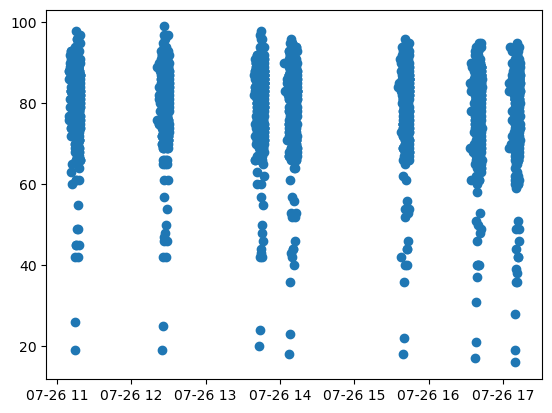

In [300]:
plt.scatter(final_df["dt"],final_df["humidity"])

In [301]:
def display_humidity(city):
    sns.lineplot(final_df[final_df['name'] == city], x = 'dt', y = 'humidity')
    plt.xlabel('time')
    plt.title(city)

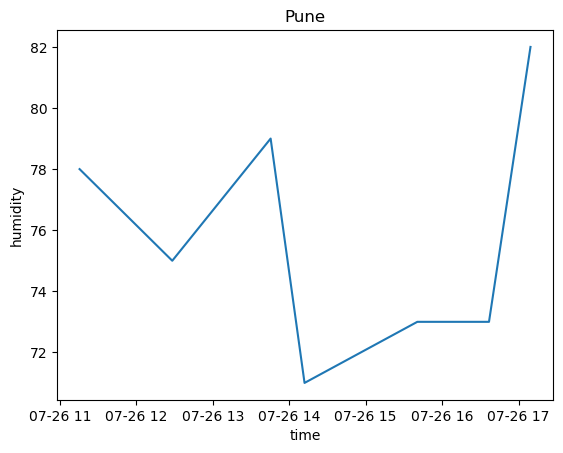

In [302]:
display_humidity("Pune")

In [303]:
final_df['hour'] = final_df['dt'].dt.hour
final_df

,name,weather,humidity,temp,speed,grnd_level,dt,hour
0,Achalpur,Rain,88,298.31,5.07,959,2024-07-26 11:13:17,11
1,Aheri,Clouds,90,298.94,3.31,985,2024-07-26 11:14:12,11
2,Ahmadpur,Clouds,86,296.05,7.39,946,2024-07-26 11:14:13,11
3,Ahmednagar,Clouds,75,297.60,9.73,933,2024-07-26 11:14:13,11
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 11:14:13,11
...,...,...,...,...,...,...,...,...
2788,Warud,Rain,93,298.44,3.76,954,2024-07-26 17:11:48,17
2789,Wāshīm,Clouds,74,300.66,9.34,940,2024-07-26 17:13:29,17
2790,Yāval,Rain,82,300.72,7.06,975,2024-07-26 17:11:46,17
2791,Yavatmal,Rain,86,298.36,6.41,950,2024-07-26 17:10:16,17


In [304]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        2793 non-null   object        
 1   weather     2793 non-null   object        
 2   humidity    2793 non-null   int64         
 3   temp        2793 non-null   float64       
 4   speed       2793 non-null   float64       
 5   grnd_level  2793 non-null   int64         
 6   dt          2793 non-null   datetime64[ns]
 7   hour        2793 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 174.7+ KB


# Weather Data Analysis

In [305]:
def display_weather(city):
    fig, ax = plt.subplots(2,2, figsize = (10,8), sharex=True)

    ax[0,0].plot(final_df["hour"][final_df["name"] == city], final_df["humidity"][final_df["name"] == city], color = "r")
    ax[0,1].plot(final_df["hour"][final_df["name"] == city], final_df["temp"][final_df["name"] == city], color = "g")
    ax[1,0].plot(final_df["hour"][final_df["name"] == city], final_df["speed"][final_df["name"] == city], color = "b")
    ax[1,1].plot(final_df["hour"][final_df["name"] == city], final_df["grnd_level"][final_df["name"] == city])
    
    ax[0, 0].set_title("Hours vs Humidity")
    ax[0, 0].set_xlabel("Hours")
    ax[0, 0].set_ylabel("Humidity")
    
    ax[0, 1].set_title("Hours vs Temp")
    ax[0, 1].set_xlabel("Hours")
    ax[0, 1].set_ylabel("Temperature")
    
    ax[1, 0].set_title("Hours vs Speed")
    ax[1, 0].set_xlabel("Hours")
    ax[1, 0].set_ylabel("Speed")
    
    ax[1, 1].set_title("Hours vs Grnd_level")
    ax[1, 1].set_xlabel("Hours")
    ax[1, 1].set_ylabel("Ground_level")
    
    
    plt.tight_layout()

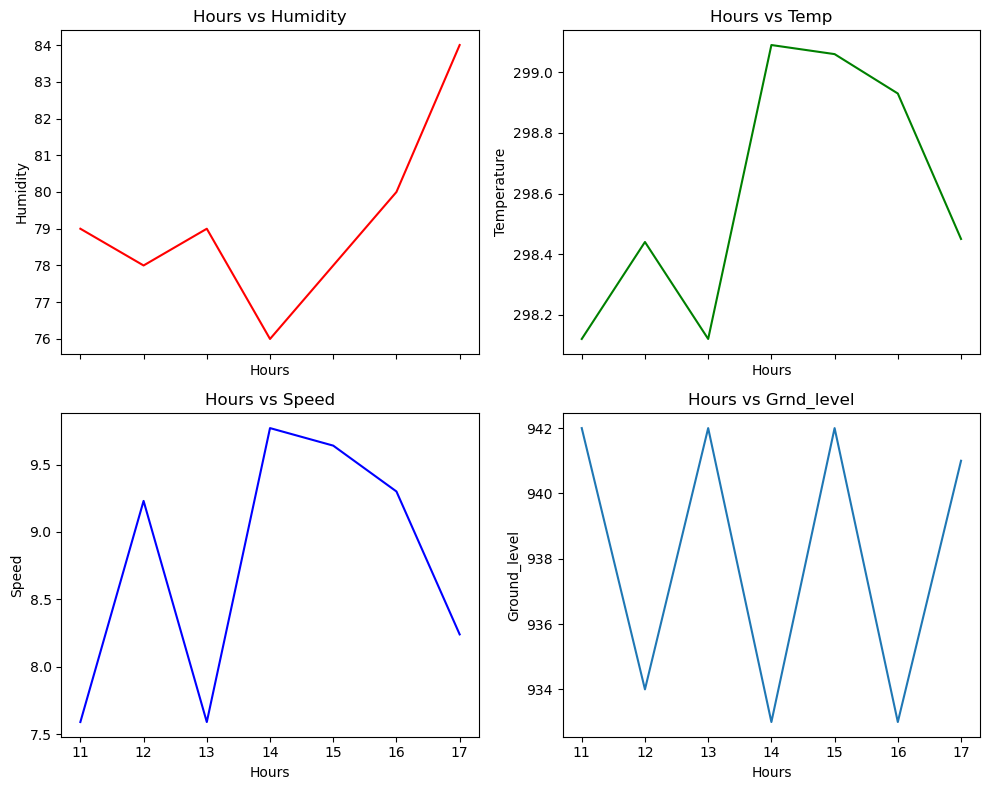

In [306]:
display_weather("Pimpri-Chinchwad")

# Display Weather Data for Pune Region

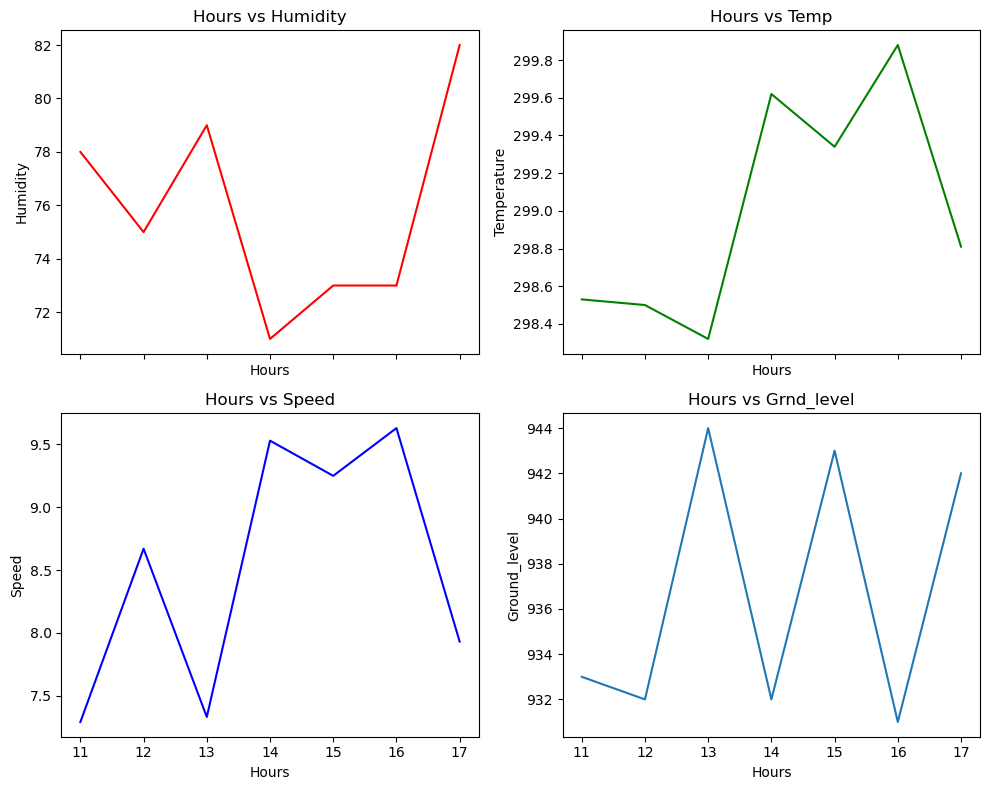

In [307]:
display_weather("Pune")

# Overall Distribution of Weather in Maharashtra

Text(0.5, 1.0, 'Weather Wise Count')

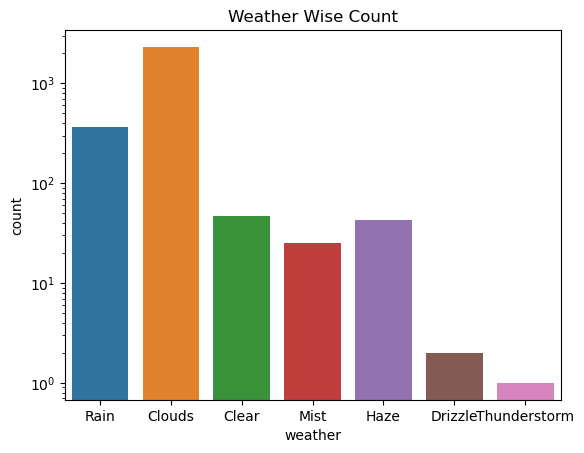

In [308]:
sns.countplot(final_df,x=final_df["weather"], log=True)
plt.title("Weather Wise Count")

# Weather Distribution City Wise

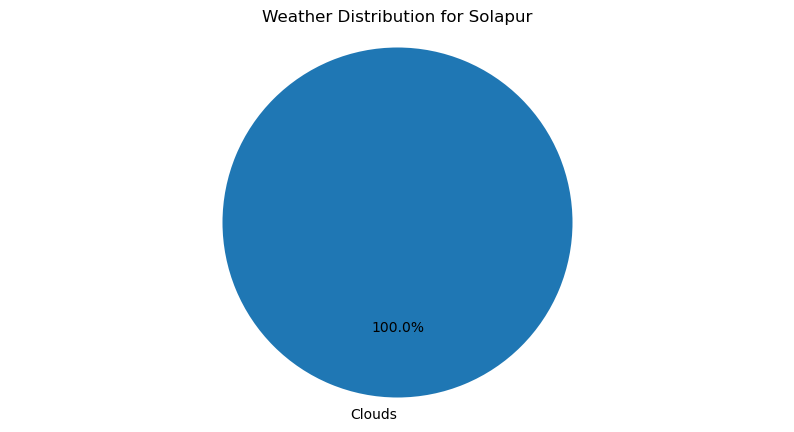

In [329]:

city = "Solapur"

aheri_data = final_df[final_df['name'] == city]

# Count the occurrences of each weather type for 'City'
weather_counts = aheri_data['weather'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,5))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(f"Weather Distribution for {city}")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


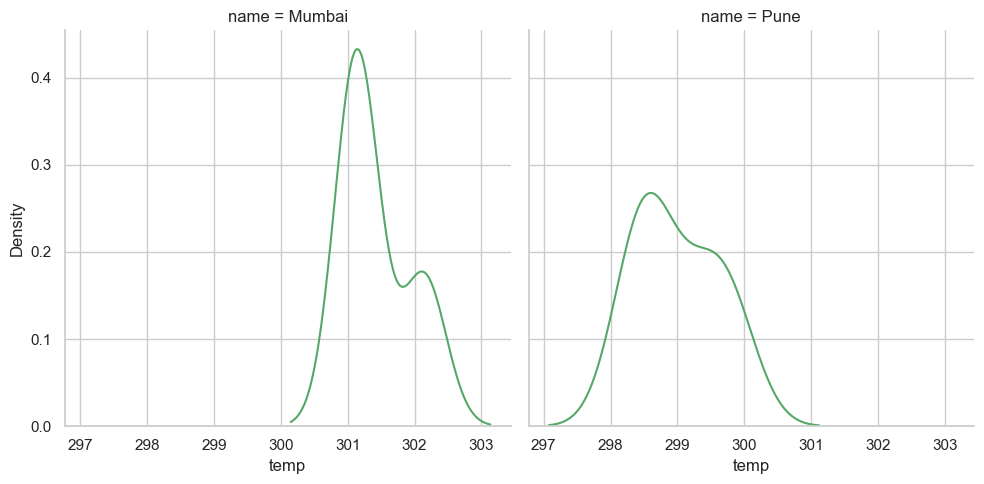

In [349]:
city_data = final_df[(final_df["name"] == "Mumbai") | (final_df["name"] == "Pune")]

sns.displot(x="temp", data=city_data, color="g",col="name",kind='kde')
plt.show()
# city_data

In [352]:
import sqlite3

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('weather_data.db')

# Create a cursor object using the connection
cursor = conn.cursor()

# Create a table in the database
cursor.execute('''
    CREATE TABLE IF NOT EXISTS weather (
        name REAL,
        weather REAL,
        humidity INTEGER ,
        temp REAL,
        speed REAL,
        ground_level INTEGER,
        dt datetime,
        hour time
    )
''')

# Commit the changes to the database
conn.commit()

final_df.to_sql('weather_data', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()


In [351]:
final_df

,name,weather,humidity,temp,speed,grnd_level,dt,hour
0,Achalpur,Rain,88,298.31,5.07,959,2024-07-26 11:13:17,11
1,Aheri,Clouds,90,298.94,3.31,985,2024-07-26 11:14:12,11
2,Ahmadpur,Clouds,86,296.05,7.39,946,2024-07-26 11:14:13,11
3,Ahmednagar,Clouds,75,297.60,9.73,933,2024-07-26 11:14:13,11
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 11:14:13,11
...,...,...,...,...,...,...,...,...
2788,Warud,Rain,93,298.44,3.76,954,2024-07-26 17:11:48,17
2789,Wāshīm,Clouds,74,300.66,9.34,940,2024-07-26 17:13:29,17
2790,Yāval,Rain,82,300.72,7.06,975,2024-07-26 17:11:46,17
2791,Yavatmal,Rain,86,298.36,6.41,950,2024-07-26 17:10:16,17


In [355]:
import sqlite3

# Connect to the database (or create it)
connection = sqlite3.connect('weather_data.db')

# Fetch data into a DataFrame
df = pd.read_sql_query("SELECT * FROM weather_data", connection)

# Close the connection
connection.close()

# Display the DataFrame
final_df = pd.DataFrame(df)



,name,weather,humidity,temp,speed,grnd_level,dt,hour
0,Achalpur,Rain,88,298.31,5.07,959,2024-07-26 11:13:17,11
1,Aheri,Clouds,90,298.94,3.31,985,2024-07-26 11:14:12,11
2,Ahmadpur,Clouds,86,296.05,7.39,946,2024-07-26 11:14:13,11
3,Ahmednagar,Clouds,75,297.60,9.73,933,2024-07-26 11:14:13,11
4,Airoli,Clouds,83,301.16,5.14,1003,2024-07-26 11:14:13,11
...,...,...,...,...,...,...,...,...
2788,Warud,Rain,93,298.44,3.76,954,2024-07-26 17:11:48,17
2789,Wāshīm,Clouds,74,300.66,9.34,940,2024-07-26 17:13:29,17
2790,Yāval,Rain,82,300.72,7.06,975,2024-07-26 17:11:46,17
2791,Yavatmal,Rain,86,298.36,6.41,950,2024-07-26 17:10:16,17
